# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Adnin Danil Azkia
- **Email:** adnindanil03@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/adnindanil/academies

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata kadar $PM_{2.5}$ di seluruh stasiun pada setiap bulannya sepanjang tahun 2013-2017?
- Bagaimana korelasi antara suhu udara (TEMP) dengan konsentrasi PM2.5 di stasiun Aotizhongxin selama periode tahun 2013-2017?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
path = '/content/data_air_quality'
files = os.listdir(path)

all_df = []
for file in files:
    if file.endswith('.csv'):
        df_temp = pd.read_csv(os.path.join(path, file))
        all_df.append(df_temp)

main_df = pd.concat(all_df, ignore_index=True)

print(f'Total baris data: {main_df.shape}')

Total baris data: (420768, 18)


**Insight:**
- Dataset hasil penggabungan dari 12 data csv memiliki total 420768 baris dan 18 kolom.
- Dataset yang kita gunakan cukup besar karena gabungan dari beberapa wilayah

### Assessing Data

In [3]:
# Melihat informasi dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
# Mengecek missing value
main_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [5]:
# Mengecek nilai yang duplikat
main_df.duplicated().sum()

np.int64(0)

In [6]:
# Melihat statistik deskriptif dari dataset
main_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Terdapat beberapa kolom yang memiliki missing values. Oleh sebab itu kita harus melakukan cleaning data sebelum datanya digunakan untuk analisa
- Tidak ada data yang duplikat
- Kolom PM2.5 dan PM10 sepertinya terdapat outlier karena rentang antara nilai rata-rata dan nilai maximum sangat jauh.

### Cleaning Data

In [7]:
main_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [8]:
# Mengisi missing value
missing_column = ['PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']
for col in missing_column:
    main_df[col].interpolate(method='linear', limit_direction='forward', inplace=True)

/tmp/ipython-input-1136348691.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df[col].interpolate(method='linear', limit_direction='forward', inplace=True)
/tmp/ipython-input-1136348691.py:4: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  main_df[col].interpolate(method='linear', limit_direction='forward', inplace=True)


In [9]:
# Mengecek apakah masih ada kolom yang missing value
main_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,2
CO,0


In [10]:
# Kolom 'wd' masih kosong karena tipe datanya object, oleh sebab itu kita harus memperlakukan dengan metode yang berbeda
main_df['wd'].fillna(main_df['wd'].mode()[0], inplace=True)

"""Kolom 'NO2' masih ada 2 yang kosong karena kemungkinan tidak ada data yang terisi sebelumnya. Hal ini terjadi
karena saya menggunakan interpolate linear. Biasanya terjadi pada index 0 dan 1 (baris awal)"""

main_df['NO2'].interpolate(method='linear', limit_direction='both', inplace=True)

# Mengecek ulang missing value
main_df.isna().sum()

/tmp/ipython-input-2120075813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['wd'].fillna(main_df['wd'].mode()[0], inplace=True)
/tmp/ipython-input-2120075813.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [11]:
main_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [12]:
main_df.dtypes

,0
No,int64
year,int64
month,int64
day,int64
hour,int64
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64


In [13]:
# Menghapus Outlier
kolom = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
Q1 = main_df[kolom].quantile(0.25)
Q3 = main_df[kolom].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)

for col in kolom:
    main_df[col] = main_df[col].mask(main_df[col] > maximum[col], maximum[col])
    main_df[col] = main_df[col].mask(main_df[col] < minimum[col], minimum[col])

# Mengecek ulang statistik deskriptif dari dataset
main_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,76.056150,101.463990,13.529880,50.199888,1131.529229,55.590392,13.531692,1010.753337,2.482421,0.064428,1.668642
std,10122.116943,1.177198,3.448707,8.800102,6.922195,68.208418,80.093069,14.049653,33.856128,818.445530,51.701952,11.437867,10.474302,13.797675,0.820638,1.062372
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.500000,308.500000,45.500000,143.000000,3000.000000,190.000000,41.600000,1042.800000,29.100000,72.500000,4.150000


In [14]:
# Merubah tipe data year, month, day, dan hour ke datetime
main_df['datetime'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

# Mengecek informasi dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420768 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSPM      420768 non-null  float64    

In [15]:
# Menghapus kolom No
main_df.drop(columns='No', axis=1, inplace=True)
main_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2013,3,1,1,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,2013,3,1,4,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00


**Insight:**
- Dataset sudah bersih dari missing value, duplicate, dan outliers
- Menambahkan kolom datetime yang berisi gabungan dari kolom 'year', 'month', 'day' dan 'hour'

## Exploratory Data Analysis (EDA)

### Explore rata-rata tingkat polusi di setiap stasiun.

In [16]:
# Melihat statistik deskriptif yang terakhir
main_df.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dingling,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064,NaN
mean,2014.662560,6.522930,15.729637,11.500000,76.056150,101.463990,13.529880,50.199888,1131.529229,55.590392,13.531692,1010.753337,2.482421,0.064428,NaN,1.668642,NaN,2015-03-01 11:30:00.000001024
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,2017.000000,12.000000,31.000000,23.000000,247.500000,308.500000,45.500000,143.000000,3000.000000,190.000000,41.600000,1042.800000,29.100000,72.500000,NaN,4.150000,NaN,2017-02-28 23:00:00


In [17]:
# Melihat rata-rata tingkat polusi di setiap stasiun.
main_df.groupby(by='station')['PM2.5'].mean().sort_values(ascending=False)

,PM2.5
station,
Dongsi,81.297092
Wanshouxigong,80.150963
Nongzhanguan,80.020907
Gucheng,79.744415
Wanliu,79.370865
Guanyuan,78.966728
Aotizhongxin,78.507674
Tiantan,78.241200
Shunyi,75.611409


### Explore perubahan rata-rata polutan berdasarkan bulan

In [18]:
main_df.groupby('month')['PM2.5'].mean()

,PM2.5
month,
1,85.595785
2,80.896797
3,90.005199
4,73.069522
5,63.155652
6,68.024266
7,71.310417
8,53.433011
9,61.028438


### Explore hubungan antara polutan dengan cuaca

In [19]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
cuaca = ['TEMP', 'RAIN']

main_df[polutan + cuaca].corr().loc[polutan, cuaca  ]

,TEMP,RAIN
PM2.5,-0.107348,-0.013970
PM10,-0.077798,-0.028338
SO2,-0.361299,-0.049438
NO2,-0.280467,-0.044451
CO,-0.315692,-0.010189
O3,0.607358,0.027079


**Insight:**
- 3 station yang memiliki polusi tertinggi yaitu Dongsi, Wanshouxigong, dan Nongzhanguan
- Polusi tertinggi terjadi pada bulan Desember
- Hujan memiliki korelasi negatif terhadap hampir semua polutan. Jadi, jika curah hujan tinggi, maka polusi akan semakin turun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-2030802760.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend_df = main_df.resample(rule='M', on='datetime').agg({


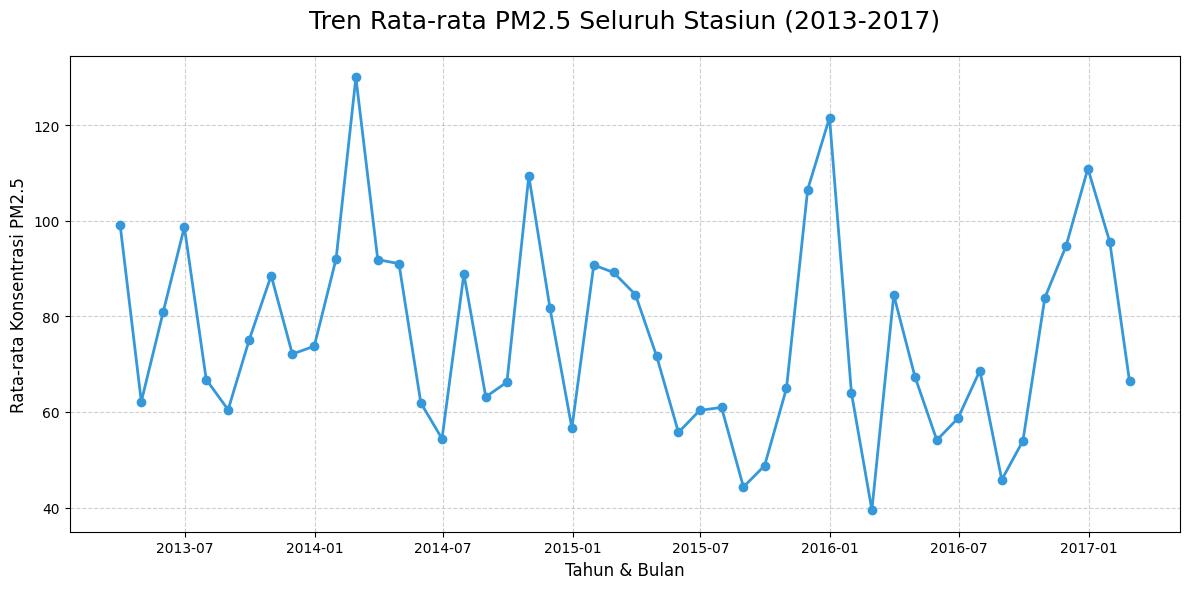

In [20]:
from matplotlib.lines import lineStyles
monthly_trend_df = main_df.resample(rule='M', on='datetime').agg({
    'PM2.5':'mean'
})

monthly_trend_df = monthly_trend_df.reset_index()

plt.figure(figsize=(12, 6))
plt.plot(
    monthly_trend_df['datetime'],
    monthly_trend_df['PM2.5'],
    marker='o',
    linewidth=2,
    color='#3498db'
)

plt.title('Tren Rata-rata PM2.5 Seluruh Stasiun (2013-2017)', loc='center', fontsize=18, pad=20)
plt.xlabel('Tahun & Bulan', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi PM2.5', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

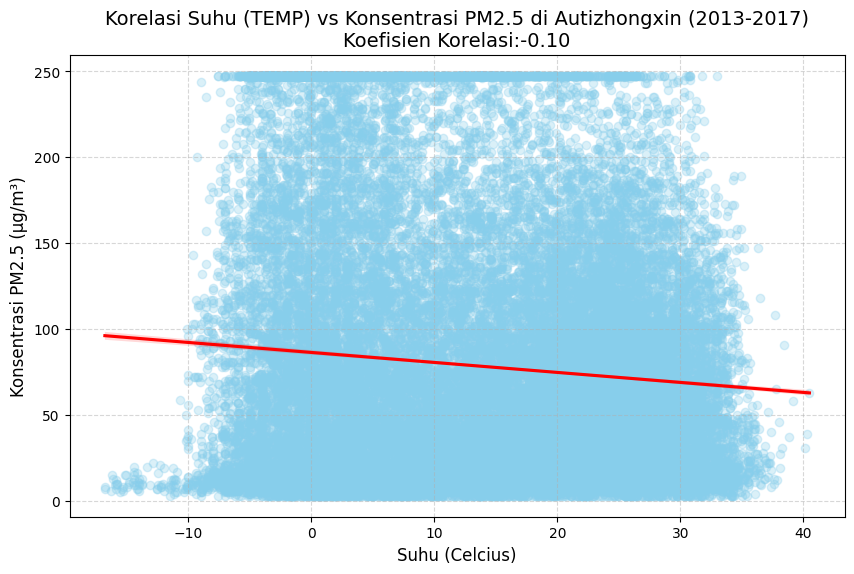

In [25]:
df_aoti = main_df[main_df['station'] == 'Aotizhongxin']
corr = df_aoti['TEMP'].corr(df_aoti['PM2.5'])

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_aoti,
    x='TEMP',
    y='PM2.5',
    scatter_kws={'alpha':0.3, 'color':'skyblue'},
    line_kws={'color':'red'}
)

plt.title(f'Korelasi Suhu (TEMP) vs Konsentrasi PM2.5 di Autizhongxin (2013-2017)\nKoefisien Korelasi:{corr:.2f}', fontsize=14)
plt.xlabel('Suhu (Celcius)', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Insight:**

### **Pertanyaan 1**
- Grafik memiliki pola berulang dimana kadar $PM_{2.5}$ selalu melonjak tinggi pada awal tahun (Sekitar bulan Januari - Maret), namun turun ketika memasuki pertengahan tahun. Kadar $PM_{2.5}$ tertinggi terjadi pada awal tahun 2014, 2016, dan 2017

### **Pertanyaan 2**
- Grafik menunjukkan koefisien korelasi sebesar -0.10. Hal ini mengindikasikan adanya hubungan negatif yang sangat lemah antara suhu udara dan konsentrasi $PM_{2.5}$ di stasiun Aotizhongxin. Ketika suhu udara meningkat, konsentrasi $PM_{2.5}$ cenderung mengalami sedikit penurunan.

## Analisis Lanjutan (Opsional)

<Axes: xlabel='hour'>

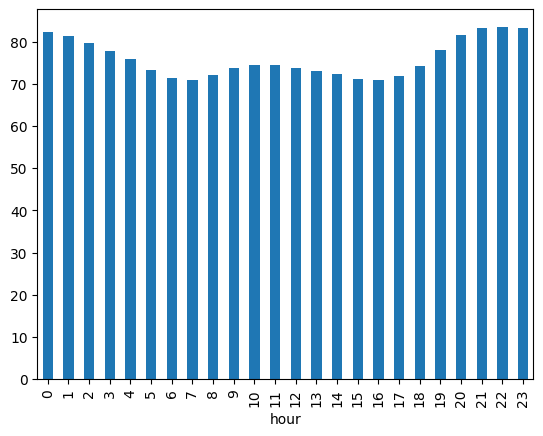

In [22]:
# Melihat rata rata polutan berdasarkan jam (hour)
main_df.groupby(by='hour')['PM2.5'].mean().plot(kind='bar')

#### Berdasarkan gambar diatas, polutan $PM_{2.5}$ kadarnya tinggi ketika malam hari (sekitar jam 9 malam hingga jam 1 dini hari)

## Conclusion

- Berdasarkan visualisasi tren waktu, dapat disimpulkan bahwa kadar $PM_{2.5}$ memiliki pola musiman yang sangat jelas. Konsentrasi polutan cenderung melonjak pada awal tahun (Januari - Maret) dan menurun di pertengahan tahun. Tren ini berulang secara konsisten dari tahun 2013 hingga 2017, dengan puncak tertinggi terjadi pada awal tahun 2014, 2016, dan 2017. Hal ini mengindikasikan bahwa kualitas udara memburuk secara signifikan pada periode awal tahun.
- Analisis korelasi menunjukkan bahwa suhu udara (TEMP) memiliki hubungan negatif yang sangat lemah ($-0.10$) terhadap konsentrasi $PM_{2.5}$ di stasiun Aotizhongxin selama periode 2013-2017. Hal ini mengindikasikan bahwa peningkatan suhu tidak secara signifikan menurunkan kadar polusi secara langsung. Meskipun terdapat tren di mana suhu yang lebih tinggi sedikit berkaitan dengan penurunan polutan (kemungkinan karena dispersi udara yang lebih baik pada cuaca panas), rendahnya nilai korelasi ini membuktikan bahwa faktor-faktor lain seperti arah angin, tingkat kelembapan, maupun aktivitas manusia (emisi kendaraan dan industri) memiliki pengaruh yang jauh lebih dominan dalam menentukan kualitas udara di lokasi tersebut dibandingkan faktor suhu saja.

In [26]:
main_df.to_csv('main_df.csv', index=False)